# Balls Image Classification

![](https://miro.medium.com/max/700/1*_Sx3eegFIFKAaM3NUCyF1g.jpeg)

### Contents
1. Abstract
2. Dataset
3. Model
4. Importing required libraries and Dataset
5. Exploratory Data analysis and Data Visualization
6. Classification Model using Neural Networks
    * Define the model
    - Deploy the model
    - Classification report
7. Observation
8. Conclusion

*******************************

### Abstract
In recent years sport video research has gained a steady interest among the scientific community. The large amount of video data available from broadcast transmissions and from dedicated camera setups, and the need of extracting meaningful information from data, pose significant research challenges. Hence, computer vision and machine learning are essential for enabling automated or semi-automated processing of big data in sports. Although sports are diverse enough to present unique challenges on their own, most of them share the need to identify active entities such as ball or players. In this project, an innovative deep learning approach to the identification of the ball in tennis context is presented. The work exploits the potential of a convolutional neural network classifier to decide whether a ball is being observed in a single frame, overcoming the typical issues that can occur dealing with classical approaches on long video sequences (e.g. illumination changes and flickering issues). Experiments on real data confirm the validity of the proposed approach that achieves 95% accuracy and suggest its implementation and integration at a larger scale in more complex vision systems.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/gpiosenka/balls-image-classification.

### Goal
The goal of this project is to make a deep learning model which will classify the images of different types of balls using the convoolution neural network, to be precise the MobileNet architecture.
******************************************


### Importing required libraries and Dataset

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [23]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sn
import cv2

import glob

### Define the paths for train, test and validation datasets

In [24]:
base_path = "../input/balls-image-classification/balls"

train_dir = "../input/balls-image-classification/balls/train"
test_dir = "../input/balls-image-classification/balls/test"
val_dir = "../input/balls-image-classification/balls/valid"

In [25]:
df = pd.read_csv("../input/balls-image-classification/balls/balls.csv")

## Exploratory Data Analysis and Data Visualization
Exploratory Data Analysis(EDA): Exploratory data analysis is a complement to inferential statistics, which tends to be fairly rigid with rules and formulas. At an advanced level, EDA involves looking at and describing the data set from different angles and then summarizing it.

Data Analysis: Data Analysis is the statistics and probability to figure out trends in the data set. It is used to show historical data by using some analytics tools. It helps in drilling down the information, to transform metrics, facts, and figures into initiatives for improvement.

**1. Total no. of images**

In [26]:
print(f"Total number of imgaes -- > {len(df)}")

Total number of imgaes -- > 3100


**2. Number of train, test and validation sets**

In [27]:
data_count = df['data set'].value_counts()

In [28]:
print(f"Number of training images --> {data_count[0]}")
print(f"Number of testing images --> {data_count[1]}")
print(f"Number of validation images --> {data_count[2]}")

Number of training images --> 2860
Number of testing images --> 120
Number of validation images --> 120


**3. Share the train, test and validation images**

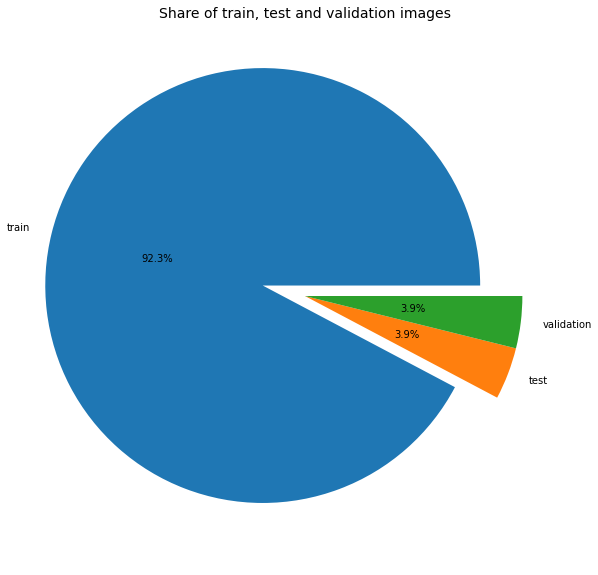

In [29]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([data_count[0], data_count[1], data_count[2]]), autopct="%.1f%%", explode=[0.2,0, 0], labels=["train", "test", "validation"], pctdistance=0.5)
plt.title("Share of train, test and validation images", fontsize=14);

### Observation : 
Training images comprise 92.3% of the total images

**4. Classes of the balls**

In [30]:
ball_classes = os.listdir(train_dir)

In [31]:
len(ball_classes)

24

**Observation** : There are 24 classes in the dataset

In [32]:
train_images = glob.glob(f"{train_dir}/*/*.jpg")
test_images = glob.glob(f"{test_dir}/*/*.jpg")
val_images = glob.glob(f"{val_dir}/*/*.jpg")

**5. Number of different types of images available**

In [33]:
class_dict = {}
for clas in ball_classes:
    num_items = len(os.listdir(os.path.join(train_dir, clas)))
    class_dict[clas] = num_items

In [34]:
class_dict

{'buckeyballs': 82,
 'brass': 113,
 'screwballs': 140,
 'medicine ball': 77,
 'puffballs': 106,
 'bowling ball': 145,
 'beachballs': 92,
 'volley ball': 131,
 'football': 112,
 'meat ball': 137,
 'tennis ball': 139,
 'baseball': 112,
 'water polo ball': 139,
 'billiard ball': 143,
 'golf ball': 106,
 'marble': 131,
 'cannon ball': 183,
 'soccer ball': 167,
 'basketball': 116,
 'wiffle ball': 99,
 'eyeballs': 139,
 'wrecking ball': 69,
 'paint balls': 32,
 'cricket ball': 150}

**6. Plotting the types of balls v/s no. of the balls**

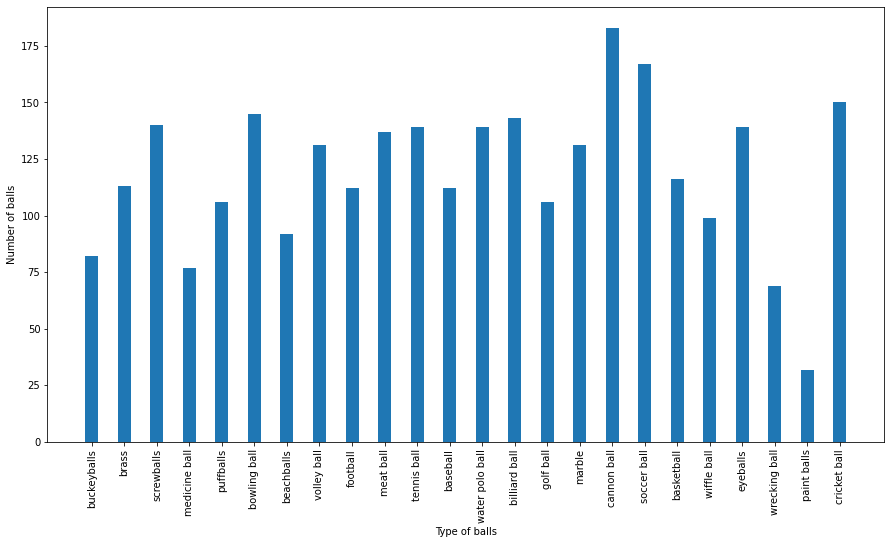

In [35]:
plt.figure(figsize=(15,8))
plt.bar(list(class_dict.keys()), list(class_dict.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Type of balls")
plt.ylabel("Number of balls")
plt.show()

**Observation** : 
<p style="font-size: 1.5rem"> <em>Paint balls</em> have the least number of images whereas <em>cannon balls</em> the highest </p>

### Plotting different images

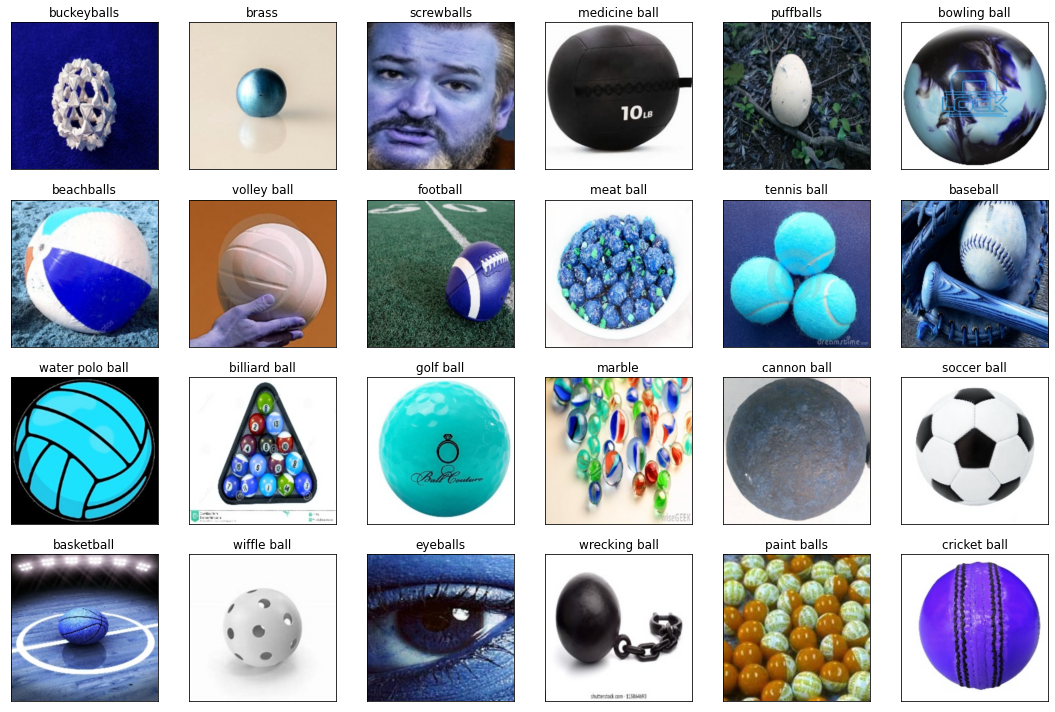

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axes.flat):
    images = os.listdir(os.path.join(train_dir, ball_classes[i]))
    img = cv2.imread(os.path.join(train_dir, ball_classes[i], images[i]))
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title(ball_classes[i])
fig.tight_layout()    
plt.show()

### Creating Image Generators

In [37]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='categorical', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(val_dir, batch_size=20, class_mode = 'categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(test_dir,shuffle=False, batch_size=20, class_mode = 'categorical', target_size=(220, 220))

Found 2860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


In [38]:
input_shape = (220, 220, 3)

*******************
## Classification Model Creation using Neural Network
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

Unlike regression, the output variable of Classification is a category, not a value, such as "Green or Blue", "fruit or animal", etc. Since the Classification algorithm is a Supervised learning technique, hence it takes labeled input data, which means it contains input with the corresponding output.

Neural Network : Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Now let's talk about the particular architecture that we are going to use here. The **MobileNet architecture** is going to be used here! 

### MobileNetV2 Architecture : 
MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. MobileNetV2 is a general architecture and can be used for multiple use cases. Depending on the use case, it can use different input layer size and different width factors. This allows different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices.

Let's deploy the model!


***************
### Define the model

In [76]:
# define the model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=input_shape, include_top=False)

for layer in base_model.layers:
    layer.trainable = False
    
    
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 24)                3096      
Total params: 2,999,128
Trainable params: 741,144
Non-trainable params: 2,257,984
______________________________________

### Model Training

In [77]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])

# callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch = 100, epochs=30)

Epoch 1/30
100/100 [==============================] - 65s 614ms/step - loss: 1.6952 - accuracy: 0.5455 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 2/30
100/100 [==============================] - 60s 600ms/step - loss: 0.3535 - accuracy: 0.9024 - val_loss: 0.2241 - val_accuracy: 0.9333
Epoch 3/30
100/100 [==============================] - 60s 600ms/step - loss: 0.2603 - accuracy: 0.9160 - val_loss: 0.1916 - val_accuracy: 0.9250
Epoch 4/30
100/100 [==============================] - 61s 605ms/step - loss: 0.2432 - accuracy: 0.9275 - val_loss: 0.1743 - val_accuracy: 0.9250
Epoch 5/30
100/100 [==============================] - 60s 600ms/step - loss: 0.1811 - accuracy: 0.9457 - val_loss: 0.2609 - val_accuracy: 0.9000
Epoch 6/30
100/100 [==============================] - 61s 610ms/step - loss: 0.1316 - accuracy: 0.9647 - val_loss: 0.2242 - val_accuracy: 0.9250
Epoch 7/30
100/100 [==============================] - 60s 603ms/step - loss: 0.1408 - accuracy: 0.9580 - val_loss: 0.1757 - val_ac

### Accuracy Checking Metrics

In [78]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

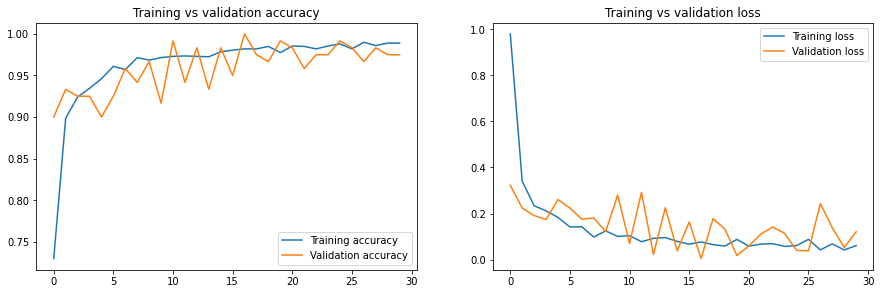

In [79]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

### Predicting the images using the deployed model

In [80]:
pred = model.predict(test_generator)

In [81]:
pred

array([[1.00000000e+00, 1.58638208e-23, 9.28864179e-26, ...,
        7.87270981e-26, 7.93219224e-17, 5.92859933e-17],
       [1.00000000e+00, 5.03271669e-21, 6.35328220e-24, ...,
        1.29906532e-25, 1.35829145e-17, 1.25466739e-17],
       [1.00000000e+00, 9.16857758e-30, 1.05971952e-34, ...,
        1.04080854e-36, 7.80674501e-24, 6.02504152e-24],
       ...,
       [9.01937363e-23, 3.55189313e-19, 9.14282085e-26, ...,
        1.66472824e-24, 2.48372837e-20, 1.00000000e+00],
       [3.35655393e-22, 2.33686459e-19, 4.29690117e-21, ...,
        3.92145375e-23, 1.91533629e-18, 1.00000000e+00],
       [9.80031947e-27, 2.27283070e-22, 4.85674802e-28, ...,
        5.05214043e-30, 6.58075952e-25, 1.00000000e+00]], dtype=float32)

In [82]:
y_pred = np.argmax(pred, axis=1)

In [83]:
y_pred_class = dict((v,k) for k,v in test_generator.class_indices.items())
    

In [84]:
y_pred_class

{0: 'baseball',
 1: 'basketball',
 2: 'beachballs',
 3: 'billiard ball',
 4: 'bowling ball',
 5: 'brass',
 6: 'buckeyballs',
 7: 'cannon ball',
 8: 'cricket ball',
 9: 'eyeballs',
 10: 'football',
 11: 'golf ball',
 12: 'marble',
 13: 'meat ball',
 14: 'medicine ball',
 15: 'paint balls',
 16: 'puffballs',
 17: 'screwballs',
 18: 'soccer ball',
 19: 'tennis ball',
 20: 'volley ball',
 21: 'water polo ball',
 22: 'wiffle ball',
 23: 'wrecking ball'}

In [85]:
y_pred

array([ 0,  0,  0,  0,  0,  1,  1,  1, 10,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 19, 15, 15, 12, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 21,
       20, 20, 20, 20, 21, 21,  1, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23])

In [86]:
y_pred = list(map(lambda x: y_pred_class[x], y_pred))

In [87]:
y_pred

['baseball',
 'baseball',
 'baseball',
 'baseball',
 'baseball',
 'basketball',
 'basketball',
 'basketball',
 'football',
 'basketball',
 'beachballs',
 'beachballs',
 'beachballs',
 'beachballs',
 'beachballs',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'brass',
 'brass',
 'brass',
 'brass',
 'brass',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'football',
 'football',
 'football',
 'football',
 'football',
 'golf ball',
 'golf ball',
 'golf ball',
 'golf ball',
 'golf ball',
 'marble',
 'marble',
 'marble',
 'marble',
 'marble',
 'meat ball',
 'meat ball',
 'meat ball',
 'meat ball',
 'meat

In [88]:
y_true = test_generator.classes

In [89]:
y_true = list(map(lambda x: y_pred_class[x], y_true))

### Classification Report for the Model
A Classification report is used to measure the quality of predictions from a classification algorithm. The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives.

In [92]:
print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

       baseball       1.00      1.00      1.00         5
     basketball       0.80      0.80      0.80         5
     beachballs       1.00      1.00      1.00         5
  billiard ball       1.00      1.00      1.00         5
   bowling ball       1.00      1.00      1.00         5
          brass       1.00      1.00      1.00         5
    buckeyballs       1.00      1.00      1.00         5
    cannon ball       1.00      1.00      1.00         5
   cricket ball       1.00      1.00      1.00         5
       eyeballs       1.00      1.00      1.00         5
       football       0.83      1.00      0.91         5
      golf ball       1.00      1.00      1.00         5
         marble       0.83      1.00      0.91         5
      meat ball       1.00      1.00      1.00         5
  medicine ball       1.00      1.00      1.00         5
    paint balls       1.00      0.60      0.75         5
      puffballs       1.00    

In [93]:
results = model.evaluate(test_generator)

6/6 [==============================] - 3s 511ms/step - loss: 0.4673 - accuracy: 0.9500


********************************
### Observation from the model
* The model deployed here is using the architecture called MobileNetV2.
* It is a neural network model architecture, mainly used for the images classification.
* The model shows a recall of 1.00
* The model shows f1 score of 1.00
* The model shows precision of 1.00
* Talking about the accuracy score, the model shows the accuracy of 0.95 or, 95%
* The model also shows the macro average of 0.95 and weighted average of 0.95.
*************************************
## Conclusion
* Images classification is one of the trending models in the recent times.
* Using of Convolution Neural Network for classifying the images, made the model to easlily deployable.
* The MobileNetV2 architecture has the special ability to classify the images from the dataset and predict the correct images.
* As the model provides an accuuracy score of 95%, for me it is the final model for this project
* Hence, **MobileNetV2 Architecture** is the best model for this dataset to deploy the classification model.
***********************************

### Hope this project will help you. Thank You!
